# **1. Perkenalan Dataset**

**Nama Dataset**: Pima Indians Diabetes Database

**Sumber**: [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

**Deskripsi**: Dataset yang digunakan adalah **Pima Indians Diabetes Database** yang berisi data medis dari pasien perempuan keturunan Pima Indian berusia minimal 21 tahun. Tujuan utama dataset ini adalah untuk memprediksi apakah seorang pasien menderita diabetes (1) atau tidak (0) berdasarkan beberapa pengukuran diagnostik.

**Fitur**:
- `Pregnancies`: Jumlah kehamilan
- `Glucose`: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- `BloodPressure`: Tekanan darah diastolik (mm Hg)
- `SkinThickness`: Ketebalan lipatan kulit trisep (mm)
- `Insulin`: Insulin serum 2 jam (mu U/ml)
- `BMI`: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
- `DiabetesPedigreeFunction`: Fungsi yang menilai riwayat diabetes dalam keluarga
- `Age`: Usia (tahun)

**Target**: `Outcome` (0 = tidak diabetes, 1 = diabetes)

# **2. Import Library**

Di bagian ini, berbagai library Python diimpor untuk berbagai kebutuhan dalam analisis data dan pemodelan:

- `pandas` dan `numpy` untuk manipulasi data.
- `matplotlib.pyplot` dan `seaborn` untuk visualisasi data.
- `train_test_split` untuk membagi dataset menjadi data latih dan data uji.
- `StandardScaler` untuk standardisasi fitur.
- `SimpleImputer` untuk menangani missing values.
- `classification_report` dan `confusion_matrix` untuk evaluasi model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# **3. Memuat Dataset**

Bagian ini berisi kode untuk memuat dataset dari file CSV bernama `diabetes.csv`. Kode juga menampilkan bentuk dataset (jumlah baris dan kolom) dan isi awal dataset untuk memberikan gambaran struktur data. Kemudian menampilkan info dataset yang menunjukkan tipe data setiap kolom dan jumlah nilai non-null, berguna untuk mendeteksi missing values.

In [2]:
df = pd.read_csv('diabetes.csv')
print("Dataset Shape:", df.shape)
display(df.head())

print("\n Data Info:")
df.info()

Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **4. Exploratory Data Analysis (EDA)**

Bagian ini berisi visualisasi dan analisis awal terhadap data:

- **Statistik Deskriptif**: Menampilkan ringkasan statistik seperti mean, standar deviasi, minimum, maksimum, dan quartiles tiap fitur numerik.

In [3]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- **Distribusi Target**: Visualisasi jumlah sampel untuk tiap kelas Outcome (0 = tidak diabetes, 1 = diabetes) menggunakan countplot. Ini membantu melihat apakah dataset seimbang atau tidak.

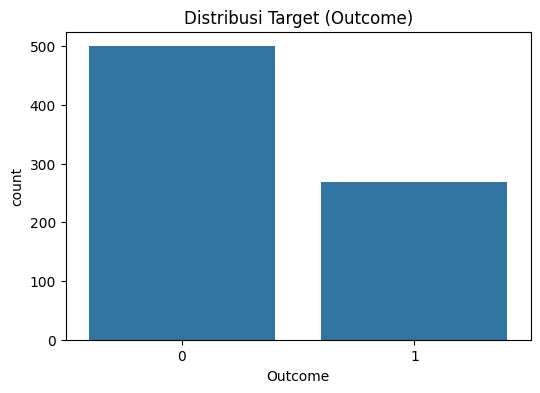

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Target (Outcome)')
plt.show()

Visualisasi ini menunjukkan jumlah pasien dengan diabetes (Outcome=1) dan tidak diabetes (Outcome=0).

- **Distribusi Fitur Numerik**: Histogram untuk tiap fitur numerik, memperlihatkan distribusi nilai pada masing-masing fitur.

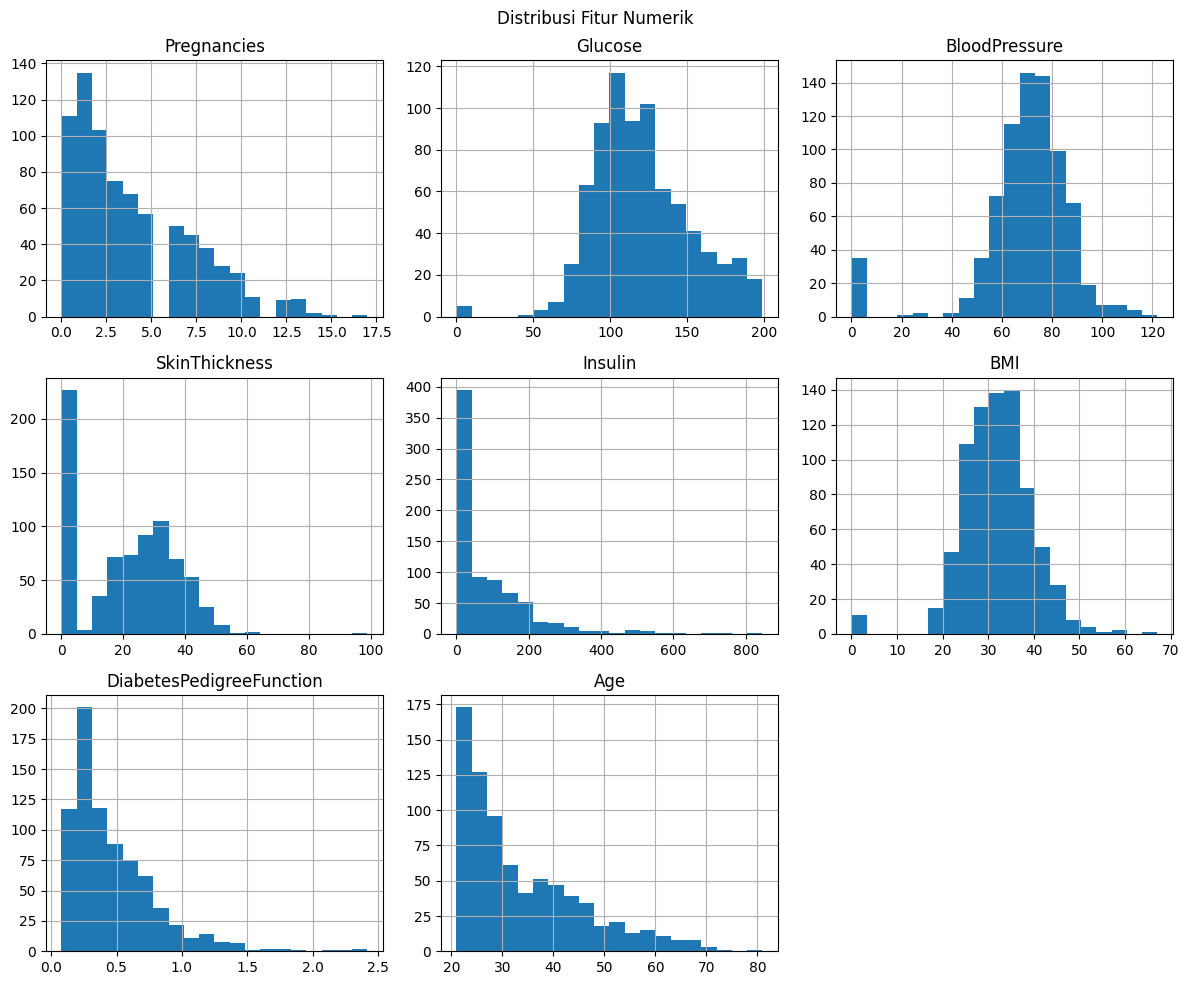

In [5]:
numeric_features = df.columns[:-1]
df[numeric_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout()
plt.show()

Histogram memberikan gambaran bagaimana nilai tiap fitur tersebar. Misalnya, apakah normal, skewed, atau terdapat nilai ekstrim. Ini membantu memahami karakteristik fitur dan potensi perlu transformasi.

- **Korelasi antar Fitur**: Heatmap korelasi yang menunjukkan hubungan linear antar fitur dan target. Korelasi positif mendekati +1 menunjukkan hubungan searah kuat, sedangkan negatif mendekati -1 menunjukkan hubungan terbalik kuat.

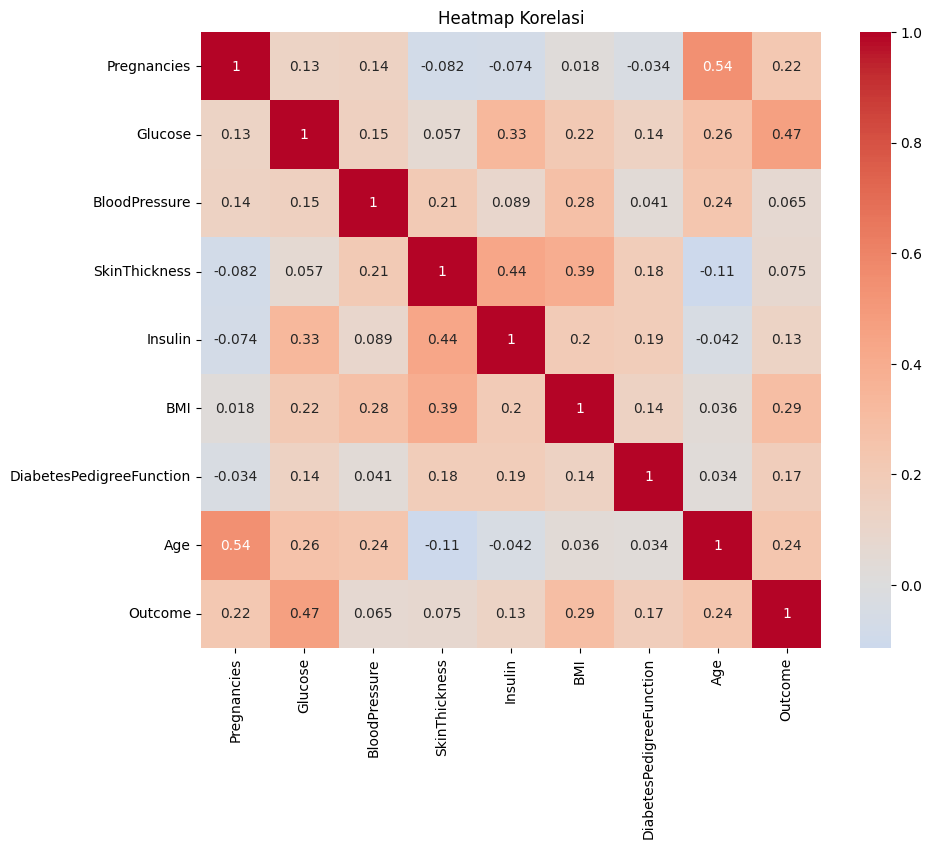

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

Menampilkan hubungan antar fitur dan antara fitur dengan target. Fitur dengan korelasi positif kuat terhadap Outcome, misalnya Glucose, berarti nilainya naik jika pasien menderita diabetes. Korelasi membantu dalam seleksi fitur atau pemahaman faktor penting.

- **Analisis Outlier**: Boxplot masing-masing fitur numerik untuk mendeteksi adanya nilai ekstrem (outlier) yang dapat memengaruhi pemodelan.

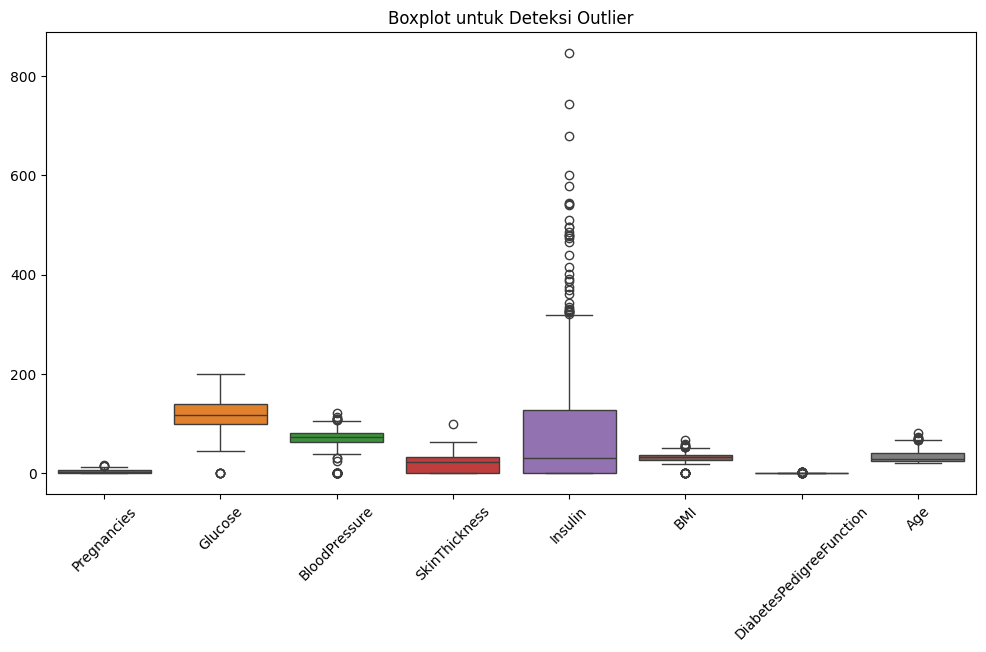

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

Boxplot menunjukkan keberadaan nilai ekstrim pada tiap fitur. Outlier bisa berdampak buruk pada model, bisa dilakukan penanganan seperti clipping atau transformasi jika perlu.

# **5. Data Preprocessing**

Langkah-langkah yang dilakukan pada bagian ini adalah:

- Beberapa fitur seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI tidak boleh memiliki nilai 0 karena secara medis tidak mungkin. Nilai 0 di kolom ini dianggap sebagai data yang hilang dan diganti (`replace`) dengan NaN.

In [8]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_features] = df[zero_features].replace(0, np.nan)

- Missing values yang muncul akibat penggantian nilai 0 tersebut diimputasi dengan nilai median dari kolom masing-masing menggunakan `SimpleImputer`.

In [9]:
imputer = SimpleImputer(strategy='median')
df[zero_features] = imputer.fit_transform(df[zero_features])

- Data kemudian dipisahkan menjadi fitur (X) dan target (y).

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

- Data dibagi menjadi data pelatihan (train) dan pengujian (test) dengan proporsi 80% train dan 20% test, dengan stratifikasi berdasarkan target sehingga proporsi kelas tetap seimbang.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

- Fitur diskalakan (dinormalisasi) menggunakan StandardScaler agar fitur memiliki rata-rata 0 dan standar deviasi 1, supaya model tidak bias ke fitur dengan skala besar.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Data pelatihan dan pengujian yang sudah diskalakan kemudian disimpan kembali dalam file CSV `diabetes_processed.csv` dengan tambahan kolom yang menandai apakah data tersebut termasuk train atau test.

In [13]:
train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_df['Outcome'] = y_train.values
train_df['Data_Type'] = 'train'

test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
test_df['Outcome'] = y_test.values
test_df['Data_Type'] = 'test'

combined_df = pd.concat([train_df, test_df])
combined_df.to_csv('diabetes_processed.csv', index=False)

print("Preprocessing selesai!")
print(f"Total records: {len(combined_df)} (Train: {len(train_df)}, Test: {len(test_df)})")

Preprocessing selesai!
Total records: 768 (Train: 614, Test: 154)
